### Student Information
Name: 高英耀

Student ID: 111062333

GitHub ID: BallPoolShark

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## 1. Import Libraries and Load Data

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from helpers.data_mining_helpers import tokenize_text
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [50]:
# Load the Reddit stock sentiment dataset
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

# Display basic information about the dataset
print(f"Dataset size: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset size: (847, 16)

Column names:
['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

First few rows:


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


## 2. Data Preparation and Exploration

In [51]:
# Select only the necessary columns: text and label
# We'll keep subreddit as well for category analysis
df_simplified = df[['text', 'label', 'subreddit']].copy()

# Display dataset info
print(f"Simplified dataset shape: {df_simplified.shape}")
print(f"\nData types:\n{df_simplified.dtypes}")
print(f"\nDataset info:")
df_simplified.info()

Simplified dataset shape: (847, 3)

Data types:
text          object
label        float64
subreddit     object
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       847 non-null    object 
 1   label      847 non-null    float64
 2   subreddit  847 non-null    object 
dtypes: float64(1), object(2)
memory usage: 20.0+ KB


## 3. Data Mining with Pandas - Missing Values

In [52]:
# Check for missing values by column
print("Missing values by column:")
print(df_simplified.isnull().sum())
print(f"\nTotal missing values: {df_simplified.isnull().sum().sum()}")

# Check for missing values by row
missing_by_row = df_simplified.isnull().any(axis=1).sum()
print(f"\nNumber of rows with at least one missing value: {missing_by_row}")

# no any missing values

Missing values by column:
text         0
label        0
subreddit    0
dtype: int64

Total missing values: 0

Number of rows with at least one missing value: 0


In [53]:
# Remove rows with missing values in the 'text' column (most important for text mining)
df_clean = df_simplified.dropna(subset=['text']).copy()

print(f"Original dataset size: {len(df_simplified)}")
print(f"Cleaned dataset size: {len(df_clean)}")
print(f"Rows removed: {len(df_simplified) - len(df_clean)}")

# we did not remove any rows since there is no missing values

Original dataset size: 847
Cleaned dataset size: 847
Rows removed: 0


## 4. Data Mining with Pandas - Duplicate Data

In [54]:
# Check for duplicate rows
duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicate text entries
duplicate_texts = df_clean.duplicated(subset=['text']).sum()
print(f"Number of duplicate text entries: {duplicate_texts}")

# Remove duplicates based on text column
df_clean = df_clean.drop_duplicates(subset=['text']).copy()
print(f"\nDataset size after removing duplicates: {len(df_clean)}")

Number of duplicate rows: 23
Number of duplicate text entries: 23

Dataset size after removing duplicates: 824


## 5. Data Preprocessing - Sampling

In [55]:
# Create a sample dataset (30% of the originel data)
sample_size = 0.3
df_sample = df_clean.sample(frac=sample_size).copy()

print(f"Original cleaned dataset size: {len(df_clean)}")
print(f"Sample dataset size: {len(df_sample)}")


Original cleaned dataset size: 824
Sample dataset size: 247


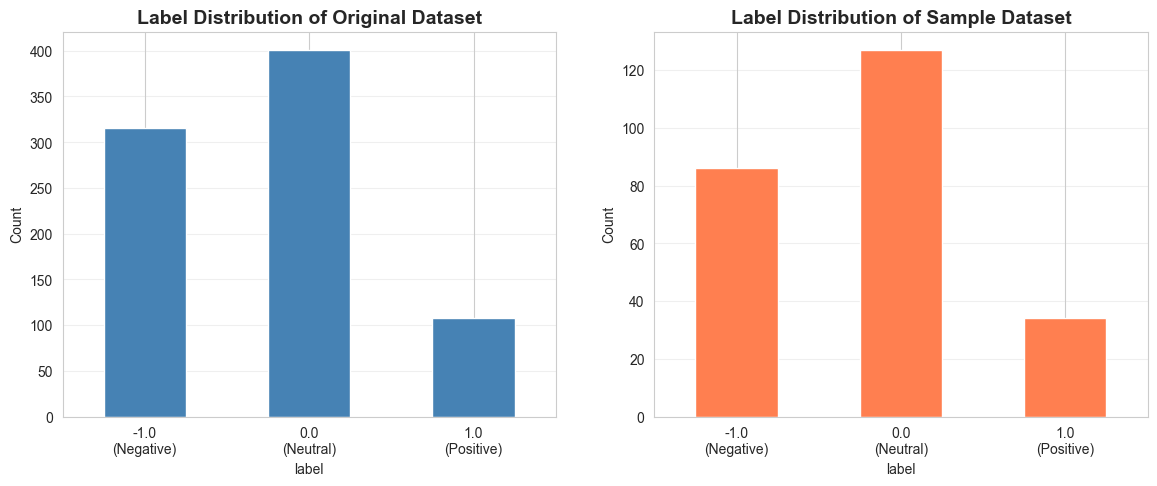

In [56]:
# Compare label distributions between original and sample datasets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original dataset distribution
df_clean['label'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Label Distribution of Original Dataset', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['-1.0\n(Negative)', '0.0\n(Neutral)', '1.0\n(Positive)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Sample dataset distribution
df_sample['label'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Label Distribution of Sample Dataset', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['-1.0\n(Negative)', '0.0\n(Neutral)', '1.0\n(Positive)'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)


plt.show()
#sample kept the same distribution as original data

## 6. Feature Creation ( Tokenization )

In [57]:
# Download required NLTK data
import nltk
nltk.data.find('tokenizers/punkt')
print("NLTK is ready")

NLTK is ready


In [58]:
# Tokenize the text data
df_sample['tokens'] = df_sample['text'].apply(lambda x: tokenize_text(str(x)))

# example tokenization
print("Example tokenization:")
print(f"\nOriginal text:\n{df_sample.iloc[0]['text'][:200]}...")
print(f"\nTokens:\n{df_sample.iloc[0]['tokens'][:20]}")

Example tokenization:

Original text:
Americans are so brain dead lol...

Tokens:
['Americans', 'are', 'so', 'brain', 'dead', 'lol']


## 7. Feature Subset Selection 

In [59]:
# Create CountVectorizer 
# We'll limit vocabulary size for efficiency and remove very common/rare words
vectorizer = CountVectorizer(
    max_features=500,  # Limit to top 500 most frequent terms
    min_df=2,          # Word must appear in at least 2 documents
    max_df=0.8,        # Word must appear in less than 80% of documents
    lowercase=True,
    stop_words='english'
)



# Fit and transform the text data
term_doc_matrix = vectorizer.fit_transform(df_sample['text'])

# Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()


print(f"Number of documents: {term_doc_matrix.shape[0]}")
print(f"Vocabulary size: {term_doc_matrix.shape[1]}")
print(f"\nFirst 20 features: {feature_names[:20]}")

Number of documents: 247
Vocabulary size: 437

First 20 features: ['00' '10' '100' '11' '12' '18630' '2025' '22' '25' '250' '350' '4260'
 '50' '500' 'able' 'actually' 'administration' 'advice' 'advisors'
 'advocating']


In [60]:
# Since Matrix is sparse
# Convert to dense array for a small sample to visualize
print(f"percentage of nonzero terms: {term_doc_matrix.nnz / (term_doc_matrix.shape[0] * term_doc_matrix.shape[1]) * 100:.2f}% non-zero")

# Show example of term-document matrix for first 3 documents and first 10 terms
dense_sample = term_doc_matrix[:3, :10].toarray()
print(f"\nExample term-document matrix (first 3 docs, first 10 terms):")
print(pd.DataFrame(dense_sample, columns=feature_names[:10]))

percentage of nonzero terms: 1.35% non-zero

Example term-document matrix (first 3 docs, first 10 terms):
   00  10  100  11  12  18630  2025  22  25  250
0   0   0    0   0   0      0     0   0   0    0
1   0   0    0   0   0      0     0   0   0    0
2   0   0    0   0   0      0     0   0   0    0


## 8. Attribute Transformation - Term Frequency Analysis

In [61]:
# Compute term frequencies across all documents
tf = np.asarray(term_doc_matrix.sum(axis=0)).flatten()

# Create a dataframe with terms and their frequencies
term_freq_df = pd.DataFrame({
    'term': feature_names,
    'frequency': tf
}).sort_values('frequency', ascending=True)
term_freq_df= term_freq_df[::-1]

print("Top 20 most frequent terms:")
print(term_freq_df.head(20))

Top 20 most frequent terms:
        term  frequency
387    trump         31
200     just         29
239   market         27
212     like         16
160    going         16
67     china         16
250    money         16
369    think         15
111      don         14
345    stock         13
270   people         13
236     make         13
361  tariffs         12
433    years         12
56       buy         11
375     time         11
163     good         11
287    price         11
92       day         11
187      img         10


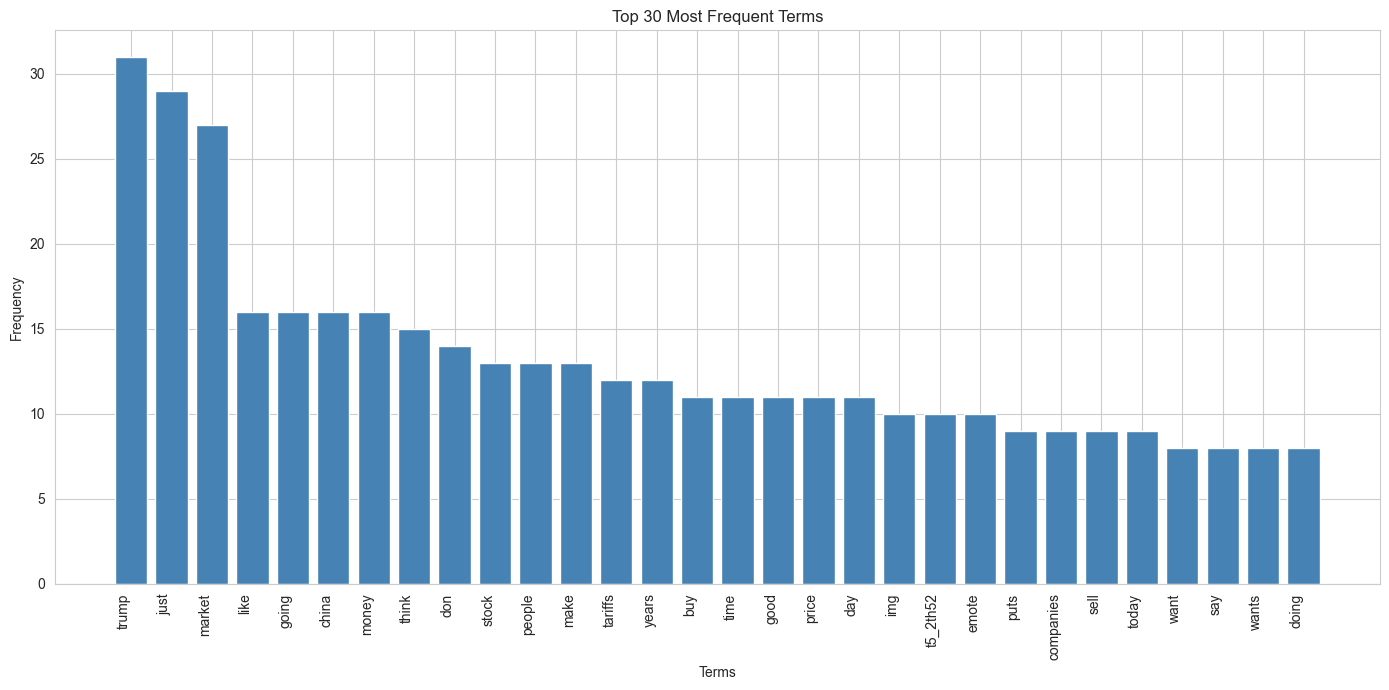

In [62]:
# Visualize top 30 terms with bar chart
top_n = 30
top_terms = term_freq_df.head(top_n)

plt.figure(figsize=(14, 7))
plt.bar(range(top_n), top_terms['frequency'], color='steelblue')
plt.xticks(range(top_n), top_terms['term'], rotation=90, ha='right')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Terms')

plt.tight_layout()
plt.show()

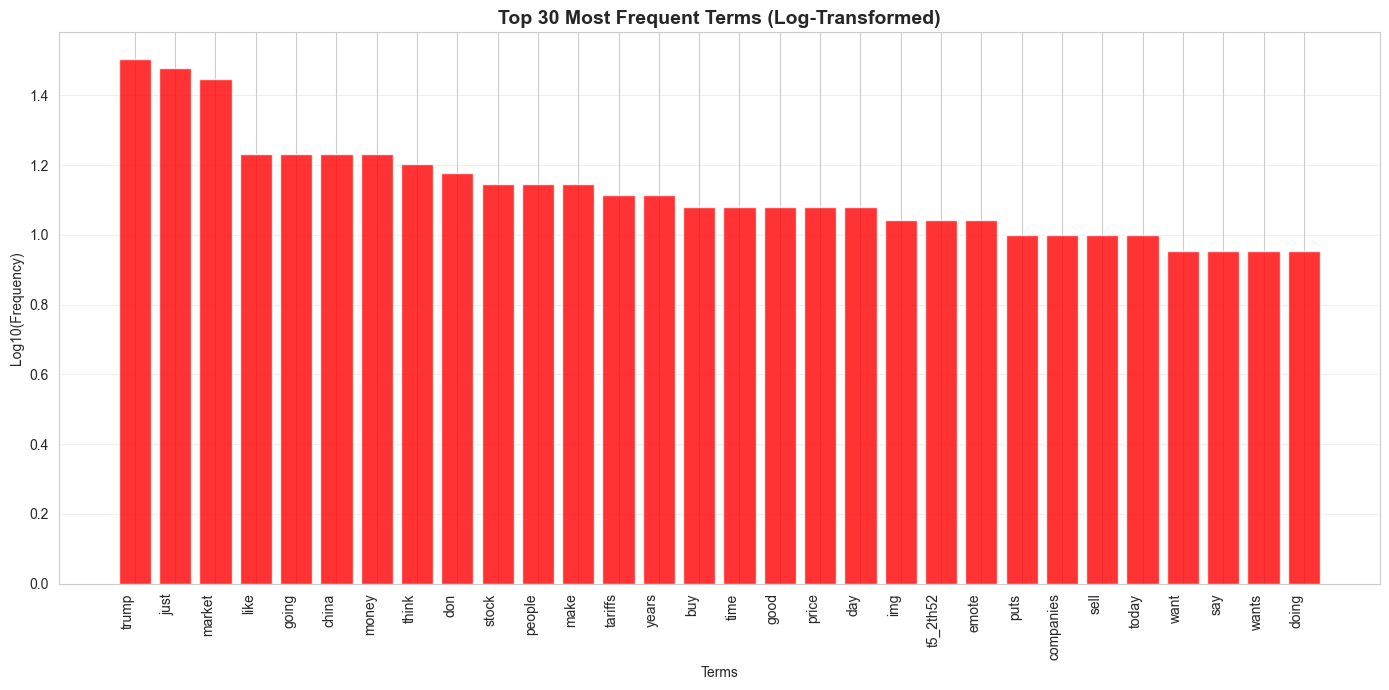

In [63]:
# Apply log transformation to better visualize the distribution
term_freq_df['log_frequency'] = np.log10(term_freq_df['frequency'] + 1)  # Add 1 to avoid log(0)

# Visualize top 30 terms with log-transformed bar chart
top_n = 30
top_terms = term_freq_df.head(top_n)

plt.figure(figsize=(14, 7))
plt.bar(range(top_n), top_terms['log_frequency'], color='red', alpha=0.8)
plt.xticks(range(top_n), top_terms['term'], rotation=90, ha='right')
plt.xlabel('Terms')
plt.ylabel('Log10(Frequency)')
plt.title(f'Top {top_n} Most Frequent Terms (Log-Transformed)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



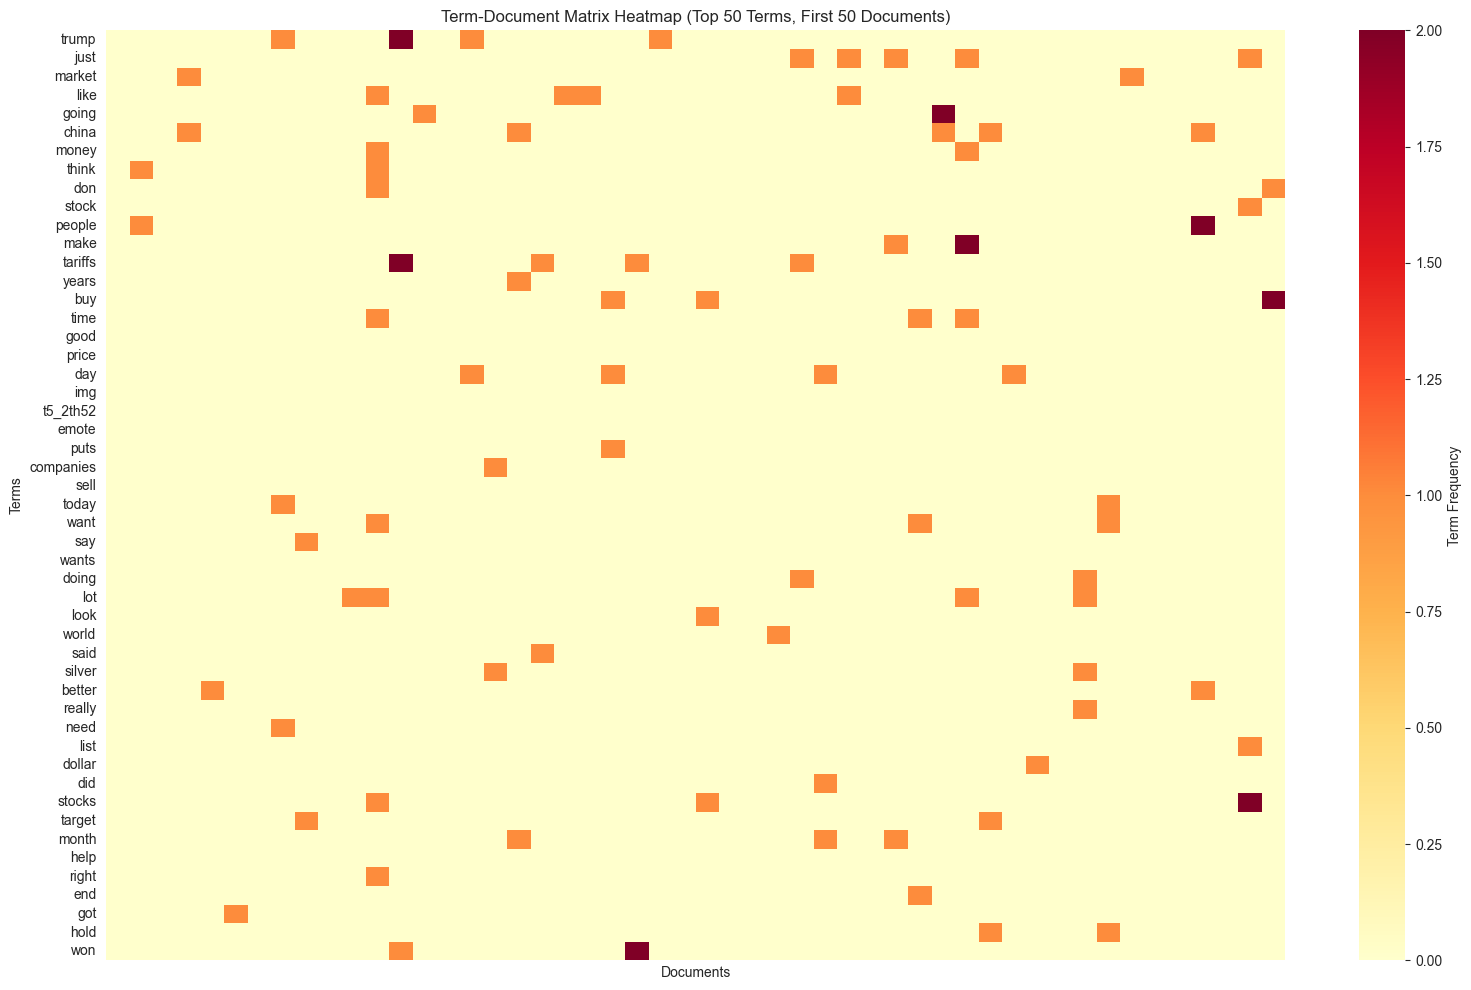

In [64]:
# Create a heatmap visualization of term-document matrix (subset for visualization)
# Select top 50 terms and a subset of documents
n_terms = 50
n_docs = 50

top_term_indices = term_freq_df.head(n_terms).index.tolist()
subset_matrix = term_doc_matrix[:n_docs, top_term_indices].toarray()

# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(subset_matrix.T, 
            cmap='YlOrRd', 
            xticklabels=False,
            yticklabels=term_freq_df.head(n_terms)['term'].values,
            cbar_kws={'label': 'Term Frequency'})
plt.xlabel('Documents')
plt.ylabel('Terms')
plt.title(f'Term-Document Matrix Heatmap (Top {n_terms} Terms, First {n_docs} Documents)', )
plt.tight_layout()
plt.show()

## 9. Additional Visualizations - Sentiment Analysis

In [65]:
# Analyze term frequencies by sentiment category
sentiment_labels = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}

# Create term-document matrices for each sentiment
sentiment_term_freq = {}

for label_val, label_name in sentiment_labels.items():
    # Filter data by sentiment
    sentiment_data = df_sample[df_sample['label'] == label_val]['text']
    
    # Create term-document matrix for this sentiment
    sentiment_matrix = vectorizer.transform(sentiment_data)
    
    # Calculate term frequencies
    term_freq = np.asarray(sentiment_matrix.sum(axis=0)).flatten()
    
    sentiment_term_freq[label_name] = term_freq

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'term': feature_names,
    'Negative': sentiment_term_freq['Negative'],
    'Neutral': sentiment_term_freq['Neutral'],
    'Positive': sentiment_term_freq['Positive']
})

# Show top terms for each sentiment
print("Top 10 terms by sentiment category:\n")
for sentiment in ['Negative', 'Neutral', 'Positive']:
    print(f"{sentiment}:")
    top_sentiment = comparison_df.nlargest(10, sentiment)[['term', sentiment]]
    print(top_sentiment.to_string(index=False))
    print()

Top 10 terms by sentiment category:

Negative:
  term  Negative
 trump        20
  just        15
  make        10
 money        10
people         9
 think         9
 china         8
 going         8
market         8
 wants         8

Neutral:
     term  Neutral
   market       16
     like       13
    stock       11
     just       10
    price        9
    trump        9
companies        7
      day        7
     list        7
   stocks        7

Positive:
   term  Positive
tariffs         5
  doing         4
   just         4
    buy         3
  china         3
   good         3
 likely         3
   long         3
 market         3
   mean         3



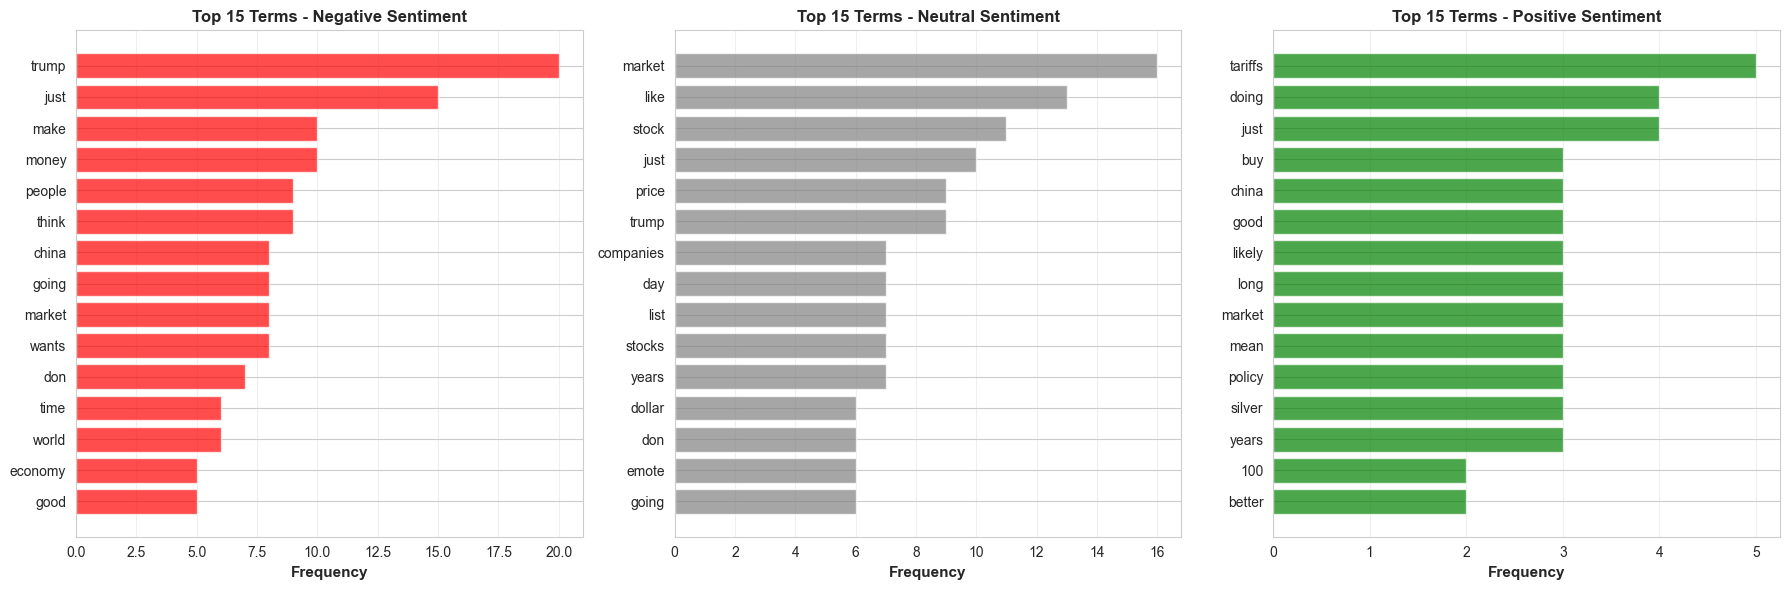

In [66]:
# Visualize top terms comparison across sentiments
n_top = 15

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (sentiment, ax) in enumerate(zip(['Negative', 'Neutral', 'Positive'], axes)):
    top_data = comparison_df.nlargest(n_top, sentiment)
    
    ax.barh(range(n_top), top_data[sentiment].values, color=['red', 'gray', 'green'][idx], alpha=0.7)
    ax.set_yticks(range(n_top))
    ax.set_yticklabels(top_data['term'].values)
    ax.invert_yaxis()
    ax.set_xlabel('Frequency', fontsize=11, fontweight='bold')
    ax.set_title(f'Top {n_top} Terms - {sentiment} Sentiment', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Subreddit Distribution Analysis

Subreddit distribution in sample:
subreddit
stocks              77
StockMarket         69
wallstreetbets      53
stockstobuytoday    48
Name: count, dtype: int64


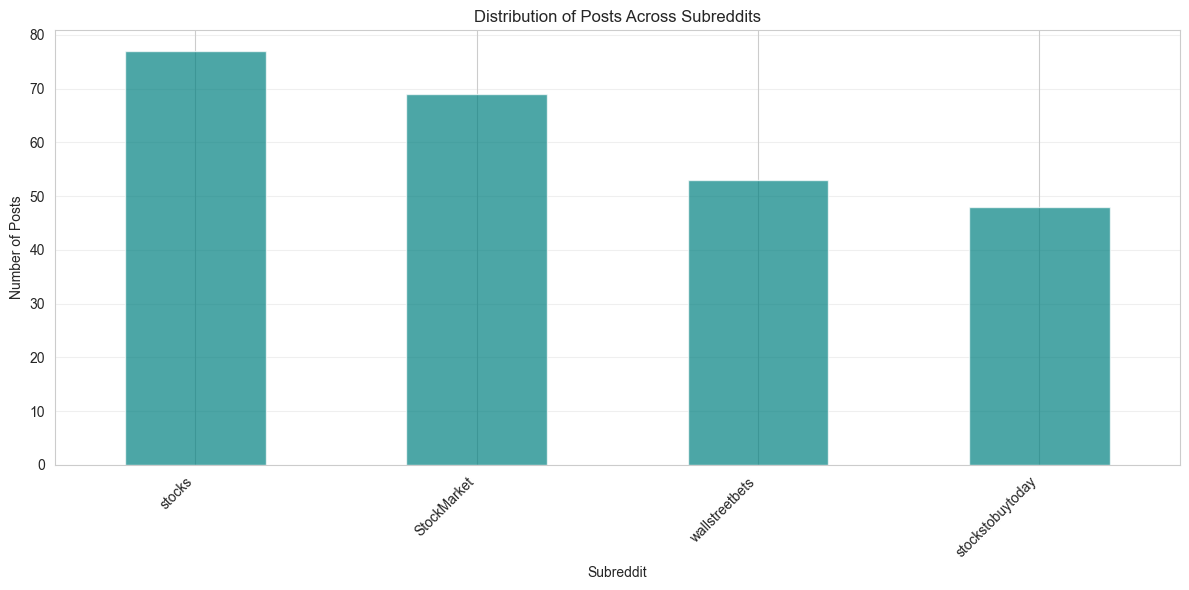

In [67]:
# Analyze subreddit distribution
print("Subreddit distribution in sample:")
subreddit_counts = df_sample['subreddit'].value_counts()
print(subreddit_counts)

# Visualize subreddit distribution
plt.figure(figsize=(12, 6))
subreddit_counts.plot(kind='bar', color='teal', alpha=0.7)
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.title('Distribution of Posts Across Subreddits')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

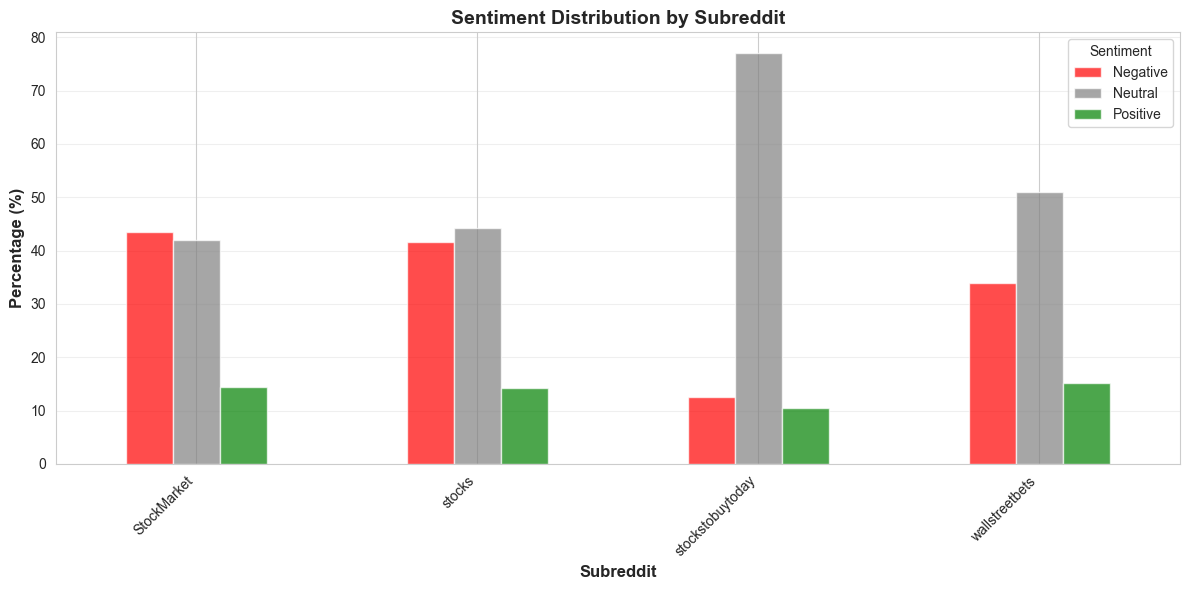

In [68]:
# Sentiment distribution by subreddit
sentiment_by_subreddit = pd.crosstab(df_sample['subreddit'], df_sample['label'], normalize='index') * 100

plt.figure(figsize=(12, 6))
sentiment_by_subreddit.plot(kind='bar', stacked=False, 
                            color=['red', 'gray', 'green'], 
                            alpha=0.7, 
                            figsize=(12, 6))
plt.xlabel('Subreddit', fontsize=12, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold')
plt.title('Sentiment Distribution by Subreddit', fontsize=14, fontweight='bold')
plt.legend(['Negative', 'Neutral', 'Positive'], title='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Phase 2

## 11. Finding Frequent Patterns

In this section, use the PAMI library to find frequent word patterns in our text data. 

In [69]:

import tempfile
import os

# Create transactional data where each row is a document with words that appear in it
transactions = []
for doc_idx in range(term_doc_matrix.shape[0]):
    doc_terms = []
    doc_vector = term_doc_matrix[doc_idx].toarray().flatten()
    for term_idx, count in enumerate(doc_vector):
        if count > 0:  # If term appears in document
            doc_terms.append(feature_names[term_idx])
    if doc_terms:  # Only add non-empty transactions
        transactions.append(doc_terms)

# Save to temporary file for PAMI
temp_file = tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.txt')
for transaction in transactions:
    temp_file.write('\t'.join(transaction) + '\n')
temp_file.close()

print(f"Created transactional dataset with {len(transactions)} transactions")
print(f"Example transaction (first document): {transactions[0][:10]}...")

Created transactional dataset with 226 transactions
Example transaction (first document): ['americans', 'brain', 'dead', 'lol']...


In [70]:
# Apply FPGrowth algorithm to find frequent patterns
from PAMI.frequentPattern.basic import FPGrowth as FP

# Set minimum support threshold (number of documents pattern must appear in)
min_support = 5  # Pattern must appear in at least 5 documents

# Run FPGrowth algorithm
fpgrowth = FP.FPGrowth(iFile=temp_file.name, minSup=min_support, sep='\t')
fpgrowth.mine()

# Get patterns
patterns = fpgrowth.getPatterns()
print(f"Number of frequent patterns found: {len(patterns)}")
print(f"\nTop 20 patterns by support:")

# Sort patterns by support
sorted_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)[:20]
for pattern, support in sorted_patterns:
    print(f"{pattern}: {support}")

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Number of frequent patterns found: 78

Top 20 patterns by support:
('just',): 29
('trump',): 25
('market',): 18
('china',): 15
('like',): 14
('going',): 14
('think',): 13
('don',): 13
('people',): 12
('money',): 12
('time',): 11
('day',): 11
('make',): 11
('years',): 10
('buy',): 10
('good',): 10
('today',): 9
('tariffs',): 9
('say',): 8
('lot',): 8


In [71]:
# Create binary pattern features matrix
# Each pattern becomes a feature: 1 if pattern exists, 0 otherwise

# Convert patterns to a list for processing
pattern_list = list(patterns.keys())

# Create binary matrix
pattern_matrix = np.zeros((len(transactions), len(pattern_list)))

for doc_idx, transaction in enumerate(transactions):
    transaction_set = set(transaction)
    for pattern_idx, pattern in enumerate(pattern_list):
        # Check if all words in pattern appear in document
        # Pattern is a tuple from PAMI, not a string
        if isinstance(pattern, tuple):
            pattern_words = pattern
        else:
            pattern_words = pattern.split()
        
        if all(word in transaction_set for word in pattern_words):
            pattern_matrix[doc_idx, pattern_idx] = 1

# Convert to DataFrame for easier handling
pattern_df = pd.DataFrame(pattern_matrix, columns=[f"pattern_{i}" for i in range(len(pattern_list))])

print(f"Pattern matrix shape: {pattern_matrix.shape}")
print(f"Number of patterns as features: {len(pattern_list)}")
print(f"\nFirst 5 patterns:")
for i in range(min(5, len(pattern_list))):
    print(f"  {i+1}. {pattern_list[i]} (appears in {int(pattern_matrix[:, i].sum())} documents)")

Pattern matrix shape: (226, 78)
Number of patterns as features: 78

First 5 patterns:
  1. ('week',) (appears in 5 documents)
  2. ('got',) (appears in 5 documents)
  3. ('let',) (appears in 5 documents)
  4. ('lmao',) (appears in 5 documents)
  5. ('right',) (appears in 5 documents)


In [72]:
# Create augmented feature matrix by concatenating TDM with pattern features
# Important: Need to handle size mismatch between TDM (all docs) and patterns (only non-empty docs)

# Get indices of documents that have at least one term (non-empty documents)
non_empty_doc_indices = []
for doc_idx in range(term_doc_matrix.shape[0]):
    doc_vector = term_doc_matrix[doc_idx].toarray().flatten()
    if doc_vector.sum() > 0:  # Document has at least one term
        non_empty_doc_indices.append(doc_idx)

print(f"Total documents: {term_doc_matrix.shape[0]}")
print(f"Non-empty documents (with terms): {len(non_empty_doc_indices)}")
print(f"Empty documents (no terms): {term_doc_matrix.shape[0] - len(non_empty_doc_indices)}")

# Create TDM dataframe only for non-empty documents
tdm_non_empty = term_doc_matrix[non_empty_doc_indices]
tdm_df = pd.DataFrame(tdm_non_empty.toarray(), columns=feature_names)

# Now both have the same number of rows
augmented_df = pd.concat([tdm_df, pattern_df], axis=1)

print(f"\nFiltered TDM shape: {tdm_df.shape}")
print(f"Pattern features shape: {pattern_df.shape}")
print(f"Augmented matrix shape: {augmented_df.shape}")
print(f"\nAugmented matrix now has {augmented_df.shape[1]} features (TDM {tdm_df.shape[1]} + patterns {pattern_df.shape[1]})")

# Store the indices for later use when filtering labels
print(f"\nNote: Stored non_empty_doc_indices for filtering labels later")

Total documents: 247
Non-empty documents (with terms): 226
Empty documents (no terms): 21

Filtered TDM shape: (226, 437)
Pattern features shape: (226, 78)
Augmented matrix shape: (226, 515)

Augmented matrix now has 515 features (TDM 437 + patterns 78)

Note: Stored non_empty_doc_indices for filtering labels later


In [73]:
# Import TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer with similar parameters as CountVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=500,
    min_df=2,
    max_df=0.8,
    lowercase=True,
    stop_words='english'
)

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_sample['text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Number of features: {len(tfidf_feature_names)}")
print(f"\nFirst 20 features: {tfidf_feature_names[:20]}")

# Show example of TF-IDF values for first document
print(f"\nExample TF-IDF values (first document, non-zero values only):")
first_doc_tfidf = tfidf_matrix[0].toarray().flatten()
non_zero_indices = np.where(first_doc_tfidf > 0)[0][:10]
for idx in non_zero_indices:
    print(f"  {tfidf_feature_names[idx]}: {first_doc_tfidf[idx]:.4f}")

TF-IDF matrix shape: (247, 437)
Number of features: 437

First 20 features: ['00' '10' '100' '11' '12' '18630' '2025' '22' '25' '250' '350' '4260'
 '50' '500' 'able' 'actually' 'administration' 'advice' 'advisors'
 'advocating']

Example TF-IDF values (first document, non-zero values only):
  americans: 0.4634
  brain: 0.5116
  dead: 0.5116
  lol: 0.5116


## 13. Classification with Naive Bayes

We'll build Naive Bayes classifiers using:
1. Word frequency features (Count Vectorizer)
2. TF-IDF features
3. Augmented features (word frequency + patterns)

We'll compare their performance to see which approach works best for sentiment classification.

In [74]:
# Import necessary libraries for classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time

# Prepare labels
labels = df_sample['label'].values

# Filter labels to match non-empty documents (for augmented features)
labels_non_empty = labels[non_empty_doc_indices]

# Split data into train and test sets (70-30 split)
X_train_count, X_test_count, y_train, y_test = train_test_split(
    term_doc_matrix, labels, test_size=0.3, random_state=42, stratify=labels
)

X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    tfidf_matrix, labels, test_size=0.3, random_state=42, stratify=labels
)

# For augmented features, use the filtered labels (only non-empty documents)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df.values, labels_non_empty, test_size=0.3, random_state=42, stratify=labels_non_empty
)

print(f"Training set size: {X_train_count.shape[0]}")
print(f"Test set size: {X_test_count.shape[0]}")
print(f"\nAugmented training set size: {X_train_aug.shape[0]}")
print(f"Augmented test set size: {X_test_aug.shape[0]}")

print(f"\nLabel distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nLabel distribution in test set:")
print(pd.Series(y_test).value_counts().sort_index())

Training set size: 172
Test set size: 75

Augmented training set size: 158
Augmented test set size: 68

Label distribution in training set:
-1.0    60
 0.0    88
 1.0    24
Name: count, dtype: int64

Label distribution in test set:
-1.0    26
 0.0    39
 1.0    10
Name: count, dtype: int64


### 13.1 Naive Bayes with Word Frequency Features (MultinomialNB)

In [75]:
# Train Naive Bayes classifier with word frequency features
print("=" * 60)
print("Naive Bayes with Word Frequency Features (MultinomialNB)")
print("=" * 60)

start_time = time.time()
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
train_time = time.time() - start_time

# Make predictions
y_pred_count = nb_count.predict(X_test_count)

# Calculate accuracy
accuracy_count = accuracy_score(y_test, y_pred_count)

print(f"\nTraining time: {train_time:.4f} seconds")
print(f"Accuracy: {accuracy_count:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_count, 
                           target_names=['Negative', 'Neutral', 'Positive']))

Naive Bayes with Word Frequency Features (MultinomialNB)

Training time: 0.0020 seconds
Accuracy: 0.4533

Classification Report:
              precision    recall  f1-score   support

    Negative       0.47      0.58      0.52        26
     Neutral       0.53      0.49      0.51        39
    Positive       0.00      0.00      0.00        10

    accuracy                           0.45        75
   macro avg       0.33      0.35      0.34        75
weighted avg       0.44      0.45      0.44        75



### 13.2 Naive Bayes with TF-IDF Features 

For TF-IDF features, we use MultinomialNB which works well with continuous positive values.

In [76]:
# Train Naive Bayes classifier with TF-IDF features
print("=" * 30)
print("Naive Bayes with TF-IDF")
print("=" * 30)

start_time = time.time()
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
train_time = time.time() - start_time

# Make predictions
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Calculate accuracy
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print(f"\nTraining time: {train_time:.4f} seconds")
print(f"Accuracy: {accuracy_tfidf:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf,
                           target_names=['Negative', 'Neutral', 'Positive']))

Naive Bayes with TF-IDF

Training time: 0.0010 seconds
Accuracy: 0.5600

Classification Report:
              precision    recall  f1-score   support

    Negative       0.58      0.27      0.37        26
     Neutral       0.56      0.90      0.69        39
    Positive       0.00      0.00      0.00        10

    accuracy                           0.56        75
   macro avg       0.38      0.39      0.35        75
weighted avg       0.49      0.56      0.48        75



### 13.3 Naive Bayes with Augmented Features (Word Frequency + Patterns)

In [77]:
# Train Naive Bayes classifier with augmented features
print("=" * 60)
print("Naive Bayes with Augmented Features (Word Freq + Patterns)")
print("=" * 60)

start_time = time.time()
nb_aug = MultinomialNB()
nb_aug.fit(X_train_aug, y_train_aug)
train_time = time.time() - start_time

# Make predictions
y_pred_aug = nb_aug.predict(X_test_aug)

# Calculate accuracy
accuracy_aug = accuracy_score(y_test_aug, y_pred_aug)

print(f"\nTraining time: {train_time:.4f} seconds")
print(f"Accuracy: {accuracy_aug:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_aug, y_pred_aug,
                           target_names=['Negative', 'Neutral', 'Positive']))

Naive Bayes with Augmented Features (Word Freq + Patterns)

Training time: 0.0020 seconds
Accuracy: 0.4853

Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.64      0.56        25
     Neutral       0.63      0.50      0.56        34
    Positive       0.00      0.00      0.00         9

    accuracy                           0.49        68
   macro avg       0.38      0.38      0.37        68
weighted avg       0.50      0.49      0.49        68



### 13.4 Comparison and Visualization


COMPARISON OF NAIVE BAYES CLASSIFIERS
                       Model  Accuracy
      Word Frequency (Count)  0.453333
                      TF-IDF  0.560000
Augmented (Count + Patterns)  0.485294

Best model: TF-IDF
Best accuracy: 0.5600


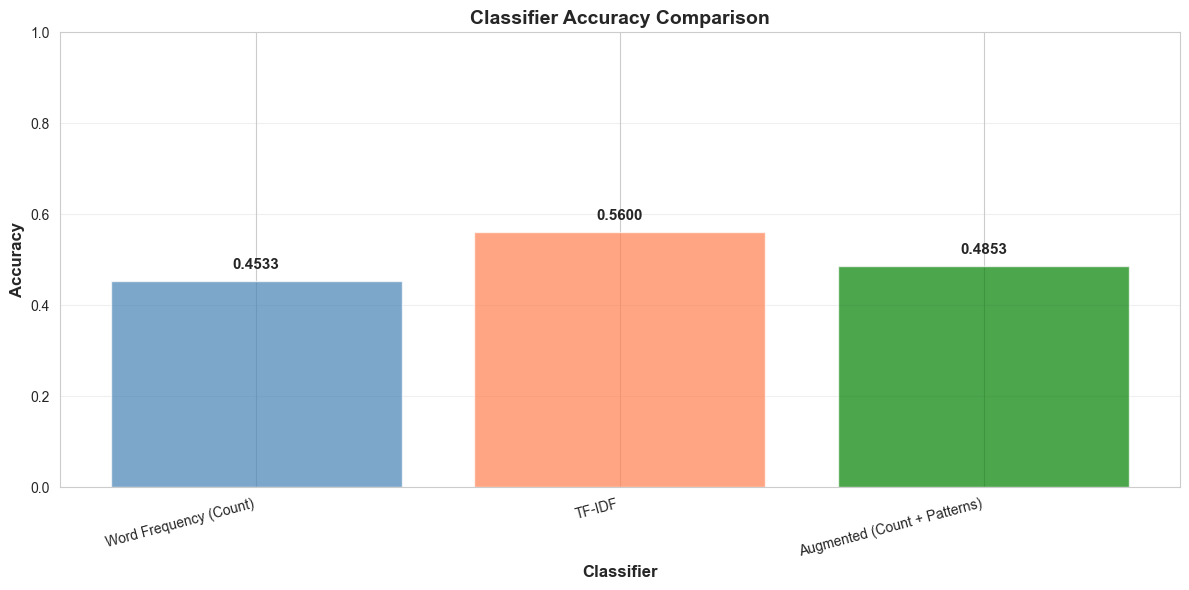

In [78]:
# Compare all classifiers
comparison_results = pd.DataFrame({
    'Model': ['Word Frequency (Count)', 'TF-IDF', 'Augmented (Count + Patterns)'],
    'Accuracy': [accuracy_count, accuracy_tfidf, accuracy_aug]
})

print("\n" + "=" * 60)
print("COMPARISON OF NAIVE BAYES CLASSIFIERS")
print("=" * 60)
print(comparison_results.to_string(index=False))
print(f"\nBest model: {comparison_results.loc[comparison_results['Accuracy'].idxmax(), 'Model']}")
print(f"Best accuracy: {comparison_results['Accuracy'].max():.4f}")

# Visualize comparison with bar plot
plt.figure(figsize=(12, 6))
plt.bar(comparison_results['Model'], comparison_results['Accuracy'], 
       color=['steelblue', 'coral', 'green'], alpha=0.7)
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Classifier', fontsize=12, fontweight='bold')
plt.title('Classifier Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Add accuracy values on top of bars
for i, (model, acc) in enumerate(zip(comparison_results['Model'], comparison_results['Accuracy'])):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

## 14.1 The Inefficiencies and Improvements

### Identified Inefficiencies:

1. **Sampling**:
   - **Issue**: We used random sampling (30%) which is too small, we need more data for better result.
   - **Improvement**: For this dataset size, we use the full cleaned dataset (824). Sampling is for very large datasets (100K+ documents).



## 14.2 improve version code



In [79]:
# Use full cleaned dataset instead of 30% sample
df_full = df_clean.copy()

print("=" * 60)
print("IMPROVEMENT: Using Full Dataset (100%)")
print("=" * 60)
print(f"\nOriginal sample size (30%): {len(df_sample)}")
print(f"Full dataset size (100%): {len(df_full)}")
print(f"Improvement: {len(df_full) - len(df_sample)} more documents ({((len(df_full) / len(df_sample)) - 1) * 100:.1f}% increase)")

print(f"\nLabel distribution in full dataset:")
print(df_full['label'].value_counts().sort_index())

IMPROVEMENT: Using Full Dataset (100%)

Original sample size (30%): 247
Full dataset size (100%): 824
Improvement: 577 more documents (233.6% increase)

Label distribution in full dataset:
label
-1.0    315
 0.0    401
 1.0    108
Name: count, dtype: int64


In [80]:
# Create vectorizers for full dataset with same parameters
vectorizer_full = CountVectorizer(
    max_features=500,
    min_df=2,
    max_df=0.8,
    lowercase=True,
    stop_words='english'
)

tfidf_vectorizer_full = TfidfVectorizer(
    max_features=500,
    min_df=2,
    max_df=0.8,
    lowercase=True,
    stop_words='english'
)

# Fit and transform the full dataset
term_doc_matrix_full = vectorizer_full.fit_transform(df_full['text'])
tfidf_matrix_full = tfidf_vectorizer_full.fit_transform(df_full['text'])
feature_names_full = vectorizer_full.get_feature_names_out()

print(f"Full dataset - Term-Document Matrix shape: {term_doc_matrix_full.shape}")
print(f"Full dataset - TF-IDF Matrix shape: {tfidf_matrix_full.shape}")
print(f"Full dataset - Vocabulary size: {len(feature_names_full)}")

Full dataset - Term-Document Matrix shape: (824, 500)
Full dataset - TF-IDF Matrix shape: (824, 500)
Full dataset - Vocabulary size: 500


In [81]:
# Create transactional data for pattern mining on full dataset
transactions_full = []
for doc_idx in range(term_doc_matrix_full.shape[0]):
    doc_terms = []
    doc_vector = term_doc_matrix_full[doc_idx].toarray().flatten()
    for term_idx, count in enumerate(doc_vector):
        if count > 0:
            doc_terms.append(feature_names_full[term_idx])
    if doc_terms:
        transactions_full.append(doc_terms)

# Save to temporary file for PAMI
temp_file_full = tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.txt')
for transaction in transactions_full:
    temp_file_full.write('\t'.join(transaction) + '\n')
temp_file_full.close()

print(f"Full dataset - Created {len(transactions_full)} transactions for pattern mining")

Full dataset - Created 739 transactions for pattern mining


In [82]:
# Run FPGrowth on full dataset
fpgrowth_full = FP.FPGrowth(iFile=temp_file_full.name, minSup=10, sep='\t')  # min_support=10 for larger dataset
fpgrowth_full.mine()

# Get patterns
patterns_full = fpgrowth_full.getPatterns()
print(f"Full dataset - Number of frequent patterns found: {len(patterns_full)}")

# Create binary pattern features matrix for full dataset
pattern_list_full = list(patterns_full.keys())
pattern_matrix_full = np.zeros((len(transactions_full), len(pattern_list_full)))

for doc_idx, transaction in enumerate(transactions_full):
    transaction_set = set(transaction)
    for pattern_idx, pattern in enumerate(pattern_list_full):
        if isinstance(pattern, tuple):
            pattern_words = pattern
        else:
            pattern_words = pattern.split()
        
        if all(word in transaction_set for word in pattern_words):
            pattern_matrix_full[doc_idx, pattern_idx] = 1

pattern_df_full = pd.DataFrame(pattern_matrix_full, columns=[f"pattern_{i}" for i in range(len(pattern_list_full))])

print(f"Full dataset - Pattern matrix shape: {pattern_matrix_full.shape}")

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Full dataset - Number of frequent patterns found: 164
Full dataset - Pattern matrix shape: (739, 164)


In [83]:
# Create augmented matrix for full dataset
# Get indices of non-empty documents
non_empty_doc_indices_full = []
for doc_idx in range(term_doc_matrix_full.shape[0]):
    doc_vector = term_doc_matrix_full[doc_idx].toarray().flatten()
    if doc_vector.sum() > 0:
        non_empty_doc_indices_full.append(doc_idx)

# Create TDM dataframe for non-empty documents
tdm_non_empty_full = term_doc_matrix_full[non_empty_doc_indices_full]
tdm_df_full = pd.DataFrame(tdm_non_empty_full.toarray(), columns=feature_names_full)

# Concatenate with pattern features
augmented_df_full = pd.concat([tdm_df_full, pattern_df_full], axis=1)

print(f"Full dataset - Augmented matrix shape: {augmented_df_full.shape}")
print(f"Full dataset - Total features: TDM ({tdm_df_full.shape[1]}) + Patterns ({pattern_df_full.shape[1]}) = {augmented_df_full.shape[1]}")

Full dataset - Augmented matrix shape: (739, 664)
Full dataset - Total features: TDM (500) + Patterns (164) = 664


###  Train Classifiers on Full Dataset

In [84]:
# Prepare labels for full dataset
labels_full = df_full['label'].values
labels_non_empty_full = labels_full[non_empty_doc_indices_full]

# Split data into train and test sets (70-30 split)
X_train_count_full, X_test_count_full, y_train_full, y_test_full = train_test_split(
    term_doc_matrix_full, labels_full, test_size=0.3, random_state=42, stratify=labels_full
)

X_train_tfidf_full, X_test_tfidf_full, _, _ = train_test_split(
    tfidf_matrix_full, labels_full, test_size=0.3, random_state=42, stratify=labels_full
)

X_train_aug_full, X_test_aug_full, y_train_aug_full, y_test_aug_full = train_test_split(
    augmented_df_full.values, labels_non_empty_full, test_size=0.3, random_state=42, stratify=labels_non_empty_full
)

print("Full Dataset Split:")
print(f"  Training set size: {X_train_count_full.shape[0]}")
print(f"  Test set size: {X_test_count_full.shape[0]}")
print(f"  Augmented training set size: {X_train_aug_full.shape[0]}")
print(f"  Augmented test set size: {X_test_aug_full.shape[0]}")

Full Dataset Split:
  Training set size: 576
  Test set size: 248
  Augmented training set size: 517
  Augmented test set size: 222


In [85]:
# Train all three classifiers on full dataset
print("=" * 70)
print("TRAINING CLASSIFIERS ON FULL DATASET")
print("=" * 70)

# 1. Word Frequency Features
print("\n1. Word Frequency Features (Count Vectorizer):")
nb_count_full = MultinomialNB()
nb_count_full.fit(X_train_count_full, y_train_full)
y_pred_count_full = nb_count_full.predict(X_test_count_full)
accuracy_count_full = accuracy_score(y_test_full, y_pred_count_full)
print(f"   Accuracy: {accuracy_count_full:.4f}")

# 2. TF-IDF Features
print("\n2. TF-IDF Features:")
nb_tfidf_full = MultinomialNB()
nb_tfidf_full.fit(X_train_tfidf_full, y_train_full)
y_pred_tfidf_full = nb_tfidf_full.predict(X_test_tfidf_full)
accuracy_tfidf_full = accuracy_score(y_test_full, y_pred_tfidf_full)
print(f"   Accuracy: {accuracy_tfidf_full:.4f}")

# 3. Augmented Features (Word Frequency + Patterns)
print("\n3. Augmented Features (Word Frequency + Patterns):")
nb_aug_full = MultinomialNB()
nb_aug_full.fit(X_train_aug_full, y_train_aug_full)
y_pred_aug_full = nb_aug_full.predict(X_test_aug_full)
accuracy_aug_full = accuracy_score(y_test_aug_full, y_pred_aug_full)
print(f"   Accuracy: {accuracy_aug_full:.4f}")

print("\n" + "=" * 70)

TRAINING CLASSIFIERS ON FULL DATASET

1. Word Frequency Features (Count Vectorizer):
   Accuracy: 0.5242

2. TF-IDF Features:
   Accuracy: 0.5363

3. Augmented Features (Word Frequency + Patterns):
   Accuracy: 0.5450



### 14.2 Comparison: Original (30% Sample) vs Improved (Full Dataset)

In [86]:
# Create comprehensive comparison DataFrame
comparison_full = pd.DataFrame({
    'Model': ['Word Frequency (Count)', 'TF-IDF', 'Augmented (Count + Patterns)'],
    'Original (30% Sample)': [accuracy_count, accuracy_tfidf, accuracy_aug],
    'Improved (Full Dataset)': [accuracy_count_full, accuracy_tfidf_full, accuracy_aug_full]
})

# Calculate improvement
comparison_full['Improvement'] = comparison_full['Improved (Full Dataset)'] - comparison_full['Original (30% Sample)']
comparison_full['Improvement %'] = (comparison_full['Improvement'] / comparison_full['Original (30% Sample)']) * 100

print("\n" + "=" * 90)
print("COMPARISON: ORIGINAL (30% SAMPLE) VS IMPROVED (FULL DATASET)")
print("=" * 90)
print(comparison_full.to_string(index=False))
print("\n" + "=" * 90)

print(f"\nBest model on original (30% sample): {comparison_full.loc[comparison_full['Original (30% Sample)'].idxmax(), 'Model']}")
print(f"  Accuracy: {comparison_full['Original (30% Sample)'].max():.4f}")

print(f"\nBest model on improved (full dataset): {comparison_full.loc[comparison_full['Improved (Full Dataset)'].idxmax(), 'Model']}")
print(f"  Accuracy: {comparison_full['Improved (Full Dataset)'].max():.4f}")

print(f"\nLargest improvement: {comparison_full.loc[comparison_full['Improvement'].idxmax(), 'Model']}")
print(f"  Improvement: {comparison_full['Improvement'].max():.4f} ({comparison_full['Improvement %'].max():.2f}%)")


COMPARISON: ORIGINAL (30% SAMPLE) VS IMPROVED (FULL DATASET)
                       Model  Original (30% Sample)  Improved (Full Dataset)  Improvement  Improvement %
      Word Frequency (Count)               0.453333                 0.524194     0.070860      15.630930
                      TF-IDF               0.560000                 0.536290    -0.023710      -4.233871
Augmented (Count + Patterns)               0.485294                 0.545045     0.059751      12.312312


Best model on original (30% sample): TF-IDF
  Accuracy: 0.5600

Best model on improved (full dataset): Augmented (Count + Patterns)
  Accuracy: 0.5450

Largest improvement: Word Frequency (Count)
  Improvement: 0.0709 (15.63%)


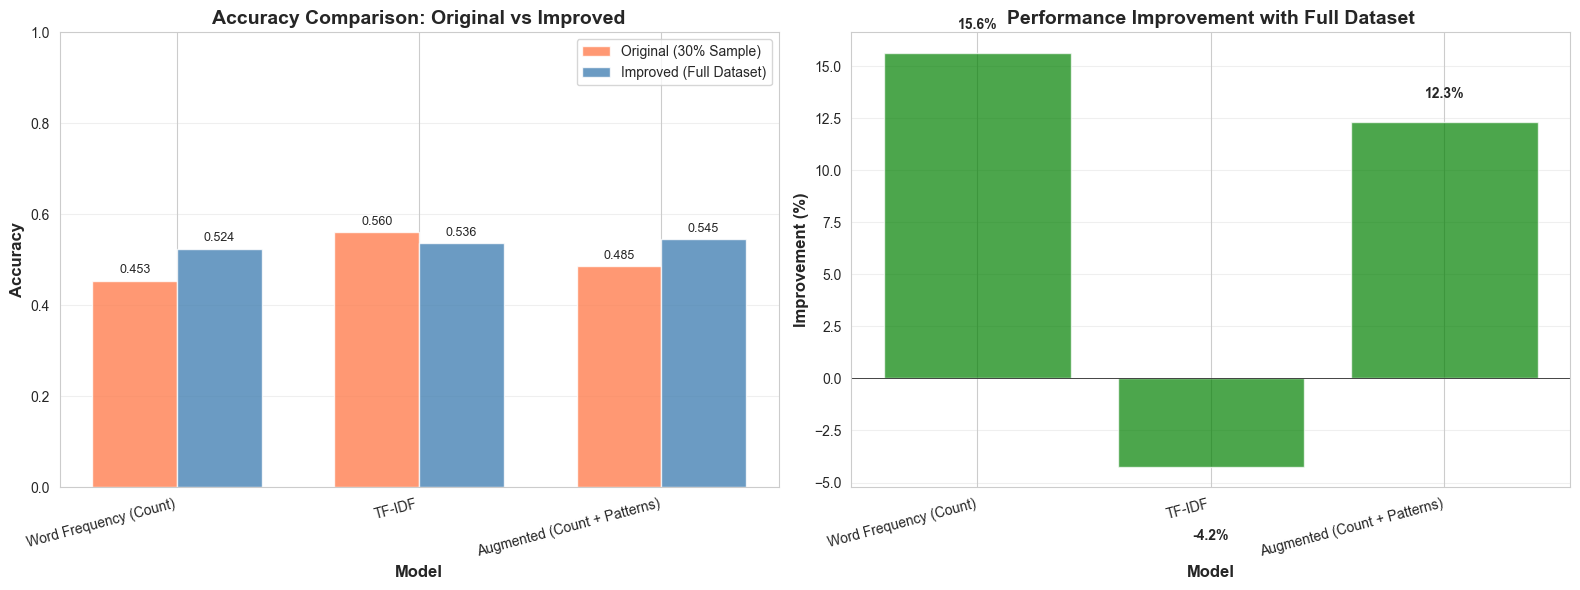

In [87]:
# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart comparing original vs improved
x = np.arange(len(comparison_full['Model']))
width = 0.35

bars1 = axes[0].bar(x - width/2, comparison_full['Original (30% Sample)'], width, label='Original (30% Sample)', color='coral', alpha=0.8)
bars2 = axes[0].bar(x + width/2, comparison_full['Improved (Full Dataset)'], width, label='Improved (Full Dataset)', color='steelblue', alpha=0.8)

axes[0].set_xlabel('Model', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Accuracy Comparison: Original vs Improved', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_full['Model'], rotation=15, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1])

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Bar chart showing improvement
bars3 = axes[1].bar(comparison_full['Model'], comparison_full['Improvement %'], color='green', alpha=0.7)
axes[1].set_xlabel('Model', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Improvement (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Performance Improvement with Full Dataset', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(comparison_full['Model'], rotation=15, ha='right')
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars3, comparison_full['Improvement %'])):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + (1 if height > 0 else -3),
                f'{val:.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [88]:
# Show detailed classification reports for improved models
print("=" * 70)
print("DETAILED CLASSIFICATION REPORTS - IMPROVED MODELS (FULL DATASET)")
print("=" * 70)

print("\n1. Word Frequency Features (Count Vectorizer):")
print("   Accuracy: {:.4f}".format(accuracy_count_full))
print(classification_report(y_test_full, y_pred_count_full, 
                           target_names=['Negative', 'Neutral', 'Positive']))

print("\n" + "=" * 70)
print("\n2. TF-IDF Features:")
print("   Accuracy: {:.4f}".format(accuracy_tfidf_full))
print(classification_report(y_test_full, y_pred_tfidf_full,
                           target_names=['Negative', 'Neutral', 'Positive']))

print("\n" + "=" * 70)
print("\n3. Augmented Features (Word Frequency + Patterns):")
print("   Accuracy: {:.4f}".format(accuracy_aug_full))
print(classification_report(y_test_aug_full, y_pred_aug_full,
                           target_names=['Negative', 'Neutral', 'Positive']))

print("\n" + "=" * 70)

DETAILED CLASSIFICATION REPORTS - IMPROVED MODELS (FULL DATASET)

1. Word Frequency Features (Count Vectorizer):
   Accuracy: 0.5242
              precision    recall  f1-score   support

    Negative       0.50      0.51      0.50        95
     Neutral       0.57      0.63      0.60       121
    Positive       0.32      0.19      0.24        32

    accuracy                           0.52       248
   macro avg       0.46      0.44      0.45       248
weighted avg       0.51      0.52      0.51       248



2. TF-IDF Features:
   Accuracy: 0.5363
              precision    recall  f1-score   support

    Negative       0.52      0.40      0.45        95
     Neutral       0.54      0.78      0.64       121
    Positive       1.00      0.03      0.06        32

    accuracy                           0.54       248
   macro avg       0.69      0.40      0.38       248
weighted avg       0.59      0.54      0.49       248



3. Augmented Features (Word Frequency + Patterns):
   Accurac